# Time series analysis on finance data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_frame = pd.read_csv(r'C:\Users\susee\Desktop\Practice\Time series analysis/Fin_analysis.csv')

In [3]:
data_frame.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN


In [4]:
# set the date column as index

In [5]:
data_frame.set_index('Date',inplace=True)

In [6]:
# finding the trend of VWAP column

<AxesSubplot:xlabel='Date'>

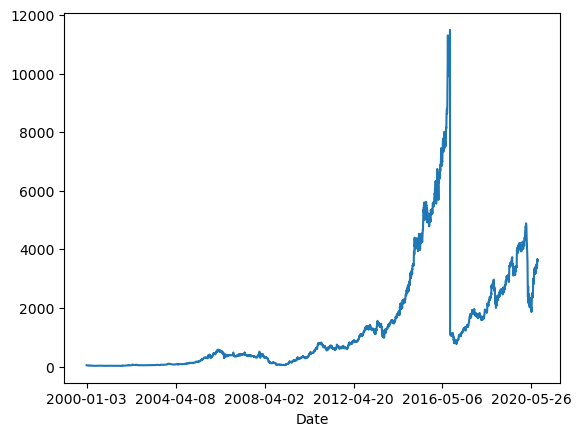

In [7]:
data_frame['VWAP'].plot()

In [8]:
data_frame.shape

(5070, 14)

In [9]:
# checking null values in the dataset

In [10]:
data_frame.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [11]:
# drop null values from the dataset

In [12]:
data_frame.dropna(inplace=True)

In [13]:
data_frame.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [14]:
data_frame.shape

(2291, 14)

In [15]:
# copying data_frame into data 

In [53]:
data1 = data_frame.copy()

In [54]:
data1

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840


In [55]:
data1.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [56]:
data1.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [20]:
# creating a list using colums - 'High', 'Low' ,'Volume'

In [21]:
lag_features = ['High', 'Low','Volume', 'Turnover','Trades']
window1 = 3
window2 = 7

In [22]:
# moving average and rolling features

In [57]:
for feature in lag_features:
    data1[feature+'_roll_mean3'] = data1[feature].rolling(window=window1).mean()
    data1[feature+'_roll_mean7'] = data1[feature].rolling(window=window2).mean()

In [58]:
for feature in lag_features:
    data1[feature+'_roll_std3'] = data1[feature].rolling(window=window1).std()
    data1[feature+'_roll_std7'] = data1[feature].rolling(window=window2).std()

# checking new features in data frame

In [59]:
data1.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_roll_std3,High_roll_std7,Low_roll_std3,Low_roll_std7,Volume_roll_std3,Volume_roll_std7,Turnover_roll_std3,Turnover_roll_std7,Trades_roll_std3,Trades_roll_std7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [60]:
data1.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_roll_mean3', 'High_roll_mean7', 'Low_roll_mean3',
       'Low_roll_mean7', 'Volume_roll_mean3', 'Volume_roll_mean7',
       'Turnover_roll_mean3', 'Turnover_roll_mean7', 'Trades_roll_mean3',
       'Trades_roll_mean7', 'High_roll_std3', 'High_roll_std7',
       'Low_roll_std3', 'Low_roll_std7', 'Volume_roll_std3',
       'Volume_roll_std7', 'Turnover_roll_std3', 'Turnover_roll_std7',
       'Trades_roll_std3', 'Trades_roll_std7'],
      dtype='object')

In [27]:
# drop columns from the data frame
### data = data.drop(['Highroll_mean7', 'Lowroll_mean3', 'Lowroll_mean7',
  #     'Volumeroll_mean3', 'Volumeroll_mean7', 'Turnoverroll_mean3',
  #   'Turnoverroll_mean7'] , inplace = True, axis=1)

In [61]:
data1.shape

(2291, 34)

In [29]:
# finding the null values in the data frame and drop

In [62]:
data1.isna().sum()

Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                 0
Deliverable Volume     0
%Deliverble            0
High_roll_mean3        2
High_roll_mean7        6
Low_roll_mean3         2
Low_roll_mean7         6
Volume_roll_mean3      2
Volume_roll_mean7      6
Turnover_roll_mean3    2
Turnover_roll_mean7    6
Trades_roll_mean3      2
Trades_roll_mean7      6
High_roll_std3         2
High_roll_std7         6
Low_roll_std3          2
Low_roll_std7          6
Volume_roll_std3       2
Volume_roll_std7       6
Turnover_roll_std3     2
Turnover_roll_std7     6
Trades_roll_std3       2
Trades_roll_std7       6
dtype: int64

In [63]:
data1.dropna(inplace = True)

In [64]:
data1.isna().sum()

Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                 0
Deliverable Volume     0
%Deliverble            0
High_roll_mean3        0
High_roll_mean7        0
Low_roll_mean3         0
Low_roll_mean7         0
Volume_roll_mean3      0
Volume_roll_mean7      0
Turnover_roll_mean3    0
Turnover_roll_mean7    0
Trades_roll_mean3      0
Trades_roll_mean7      0
High_roll_std3         0
High_roll_std7         0
Low_roll_std3          0
Low_roll_std7          0
Volume_roll_std3       0
Volume_roll_std7       0
Turnover_roll_std3     0
Turnover_roll_std7     0
Trades_roll_std3       0
Trades_roll_std7       0
dtype: int64

In [33]:
# creating list using independent features

In [65]:
data1.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_roll_mean3', 'High_roll_mean7', 'Low_roll_mean3',
       'Low_roll_mean7', 'Volume_roll_mean3', 'Volume_roll_mean7',
       'Turnover_roll_mean3', 'Turnover_roll_mean7', 'Trades_roll_mean3',
       'Trades_roll_mean7', 'High_roll_std3', 'High_roll_std7',
       'Low_roll_std3', 'Low_roll_std7', 'Volume_roll_std3',
       'Volume_roll_std7', 'Turnover_roll_std3', 'Turnover_roll_std7',
       'Trades_roll_std3', 'Trades_roll_std7'],
      dtype='object')

In [111]:
indi_feat = ['High_roll_mean3', 'High_roll_mean7', 'Low_roll_mean3',
       'Low_roll_mean7', 'Volume_roll_mean3', 'Volume_roll_mean7',
       'Turnover_roll_mean3', 'Turnover_roll_mean7', 'Trades_roll_mean3',
       'Trades_roll_mean7', 'High_roll_std3', 'High_roll_std7',
       'Low_roll_std3', 'Low_roll_std7', 'Volume_roll_std3',
       'Volume_roll_std7', 'Turnover_roll_std3', 'Turnover_roll_std7',
       'Trades_roll_std3', 'Trades_roll_std7']

In [112]:
# creating training and testing data frame

In [113]:
train_data = data1[0:1800]

In [114]:
test_data = data1[1800:]

In [115]:
train_data.shape

(1800, 34)

In [128]:
from statsmodels.tsa.arima.model import ARIMA

In [116]:
test_data.shape

(485, 34)

In [117]:
# ARIMA - Auto regressive(p) -  integrating(d) - Moving average(q) - which provides PDQ factors
#p - partial auto co-related factor which helps to reduce the co-relation in data

In [118]:
# Stationarity - variable is constant with respect to time

In [119]:
# install ARIMA

In [120]:
!pip install pmdarima

In [121]:
# applying auto ARIMA on data

In [129]:
from pmdarima import auto_arima

In [130]:
# ignore the warning

In [131]:
import warnings
##warnings.filterwarnings('ignore')

In [132]:
model = auto_arima(y = train_data['VWAP'],exogenous=train_data[indi_feat] , trace =True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.931 seconds


In [133]:
# for better ARIMA model we should have low value of AIC
# fitting model

In [134]:
model

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [135]:
model.fit(train_data['VWAP'],train_data[indi_feat])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [148]:
model.predict(n_periods=len(test_data),exogenous=test_data[indi_feat],X=test_data[indi_feat])

1800    2623.187377
1801    2638.865969
1802    2624.665321
1803    2597.896330
1804    2614.923790
           ...     
2280    2810.499283
2281    2890.718331
2282    2864.574183
2283    2810.738766
2284    2462.955810
Length: 485, dtype: float64

In [149]:
test_data['Forecast_ARIMA']=forecast

<AxesSubplot:xlabel='Date'>

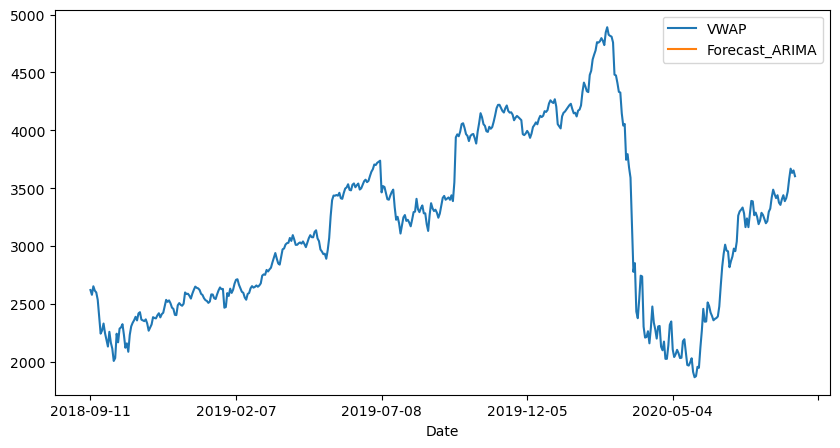

In [151]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize =(10,5))

In [152]:
# Importing mean absolute and mean squared error

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test_data['VWAP'] , test_data['Forecast_ARIMA']))

In [ ]:
mean_absolute_error(test_data['VWAP'] , test_data['Forecast_ARIMA'])